In [1]:
import os
import sys

# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image

from core.extractor import (
    ColorExtractor,
    ConceptFusionFeatureExtractor,
    GroundedSAMInstanceExtractor,
    LSegFeatureExtractor,
    MaskRCNNMaskExtractor,
    RandomSAMFeatureExtractor,
    SAMMaskExtractor,
)
from core.extractor.utils import get_kmeans_labels, show_mask


In [3]:
sam_ckpt = "/scratch/quanta/Models/SAM/sam_vit_h_4b8939.pth"
sam_type = "vit_h"
clip_type = "ViT-B/32"  # this is the clip model used by clip-glass and DeCap
clip_download_root = "/home/quanta/.cache/clip"
lseg_ckpt = "/scratch/quanta/Models/LSeg/lseg_minimal_e200.ckpt"
grounding_dino_config_pth = "../config/grounding_dino_config/GroundingDINO_SwinT_OGC.py"
grounding_dino_ckpt = "/scratch/quanta/Models/GroundingDINO/groundingdino_swint_ogc.pth"
ram_ckpt = "/scratch/quanta/Models/RAM_Tag2Text/ram_swin_large_14m.pth"
sam_hq_ckpt = "/scratch/quanta/Models/SAM_HQ/sam_hq_vit_h.pth"
mask_rcnn_ckpt = '/scratch/quanta/Models/scannet_mask_rcnn/model_0454999.pth'


In [4]:
img_path = '/scratch/quanta/Datasets/ScanNet/scans/scene0000_00/data/color/0.jpg'
img = Image.open(img_path)


In [5]:
device = 'cuda:0'


In [44]:
extractor = GroundedSAMInstanceExtractor(
    ram_ckpt=ram_ckpt,
    grounding_dino_config_pth=grounding_dino_config_pth,
    grounding_dino_ckpt=grounding_dino_ckpt,
    sam_hq_ckpt=sam_hq_ckpt,
    device=device,
    # tag_set='scannet_20',
    tag_set='built_in'
)
torch.cuda.empty_cache()
extractor.load_model()


You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embedding dimension will be 30524. This might induce some performance reduction as *Tensor Cores* will not be available. For more details about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


/encoder/layer/0/crossattention/self/query is tied
/encoder/layer/0/crossattention/self/key is tied
/encoder/layer/0/crossattention/self/value is tied
/encoder/layer/0/crossattention/output/dense is tied
/encoder/layer/0/crossattention/output/LayerNorm is tied
/encoder/layer/0/intermediate/dense is tied
/encoder/layer/0/output/dense is tied
/encoder/layer/0/output/LayerNorm is tied
/encoder/layer/1/crossattention/self/query is tied
/encoder/layer/1/crossattention/self/key is tied
/encoder/layer/1/crossattention/self/value is tied
/encoder/layer/1/crossattention/output/dense is tied
/encoder/layer/1/crossattention/output/LayerNorm is tied
/encoder/layer/1/intermediate/dense is tied
/encoder/layer/1/output/dense is tied
/encoder/layer/1/output/LayerNorm is tied
--------------
/scratch/quanta/Models/RAM_Tag2Text/ram_swin_large_14m.pth
--------------
load checkpoint from /scratch/quanta/Models/RAM_Tag2Text/ram_swin_large_14m.pth
vit: swin_l
final text_encoder_type: bert-base-uncased
<All k

In [47]:
%%time
results = extractor.extract(img)
masks = extractor.get_masks(results)


CPU times: user 1.14 s, sys: 0 ns, total: 1.14 s
Wall time: 691 ms


In [48]:
print(masks.shape, masks.dtype)


torch.Size([9, 968, 1296]) torch.bool


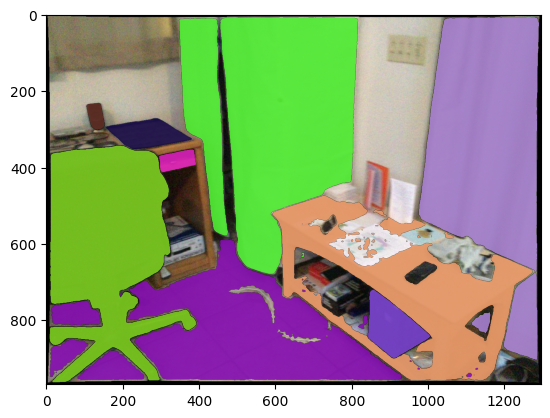

In [49]:
# plt.figure(figsize=(10, 10))
plt.imshow(img)
i=21
# for mask in [masks[i]]:
for mask in masks:
    show_mask(mask.cpu().numpy(), plt.gca(), random_color=True)

# print(results["phrases"][i])


['keyboard',
 'backpack',
 'desk',
 'office chair',
 'telephone',
 'door',
 'cup',
 'floor',
 'curtain',
 'closet rod',
 'poster',
 'box',
 'closet wall',
 'headphones',
 'bed',
 'poster',
 'bookshelf',
 'poster',
 'box',
 'window',
 'book',
 'shelf']